In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Step 1: Data Preprocessing
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the images to [0, 1] range
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape data to include a channel dimension (for grayscale)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [4]:
# Step 2: Model Development
model = models.Sequential([
    layers.InputLayer(input_shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [6]:
# Step 3: Training
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.8797 - loss: 0.3916 - val_accuracy: 0.9412 - val_loss: 0.1972
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9514 - loss: 0.1651 - val_accuracy: 0.9661 - val_loss: 0.1139
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9657 - loss: 0.1125 - val_accuracy: 0.9703 - val_loss: 0.1028
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9719 - loss: 0.0925 - val_accuracy: 0.9733 - val_loss: 0.0856
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9768 - loss: 0.0751 - val_accuracy: 0.9767 - val_loss: 0.0775
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9793 - loss: 0.0670 - val_accuracy: 0.9804 - val_loss: 0.0690
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9818 - loss: 0.0615 - val_accuracy: 0.9800 - val_loss: 0.0689
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9838 -

In [7]:
# Step 4: Evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9815 - loss: 0.0590
Test accuracy: 0.9842


In [8]:
# Step 5: Prediction
# Predict on a single image
sample_image = x_test[0:1]
predicted_class = np.argmax(model.predict(sample_image), axis=-1)
print(f'Predicted digit: {predicted_class[0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted digit: 7


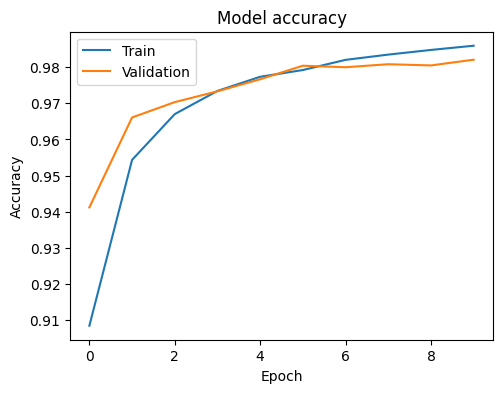

In [9]:
# Step 6: Analysis (Visualization of training)
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

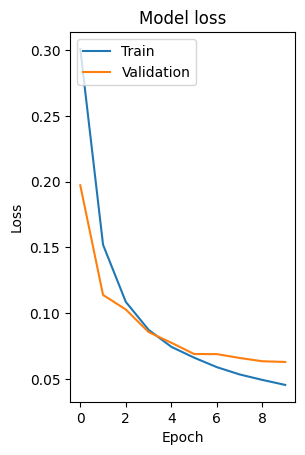

In [10]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()